<a href="https://colab.research.google.com/github/yamrajkhadka/mnist-digit-recognition./blob/main/mnist_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.8056 - loss: 1.4394 - val_accuracy: 0.9538 - val_loss: 0.6358
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9149 - loss: 0.7182 - val_accuracy: 0.9581 - val_loss: 0.4765
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9193 - loss: 0.5917 - val_accuracy: 0.9523 - val_loss: 0.4518
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.9188 - loss: 0.5668 - val_accuracy: 0.9548 - val_loss: 0.4199
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9193 - loss: 0.5348 - val_accuracy: 0.9641 - val_loss: 0.3825
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9176 - loss: 0.5308 - val_accuracy: 0.9616 - val_loss: 0.3815
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9192 - loss: 0.5149 - val_accuracy: 0.9624 - val_loss: 0.3721
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9191 -

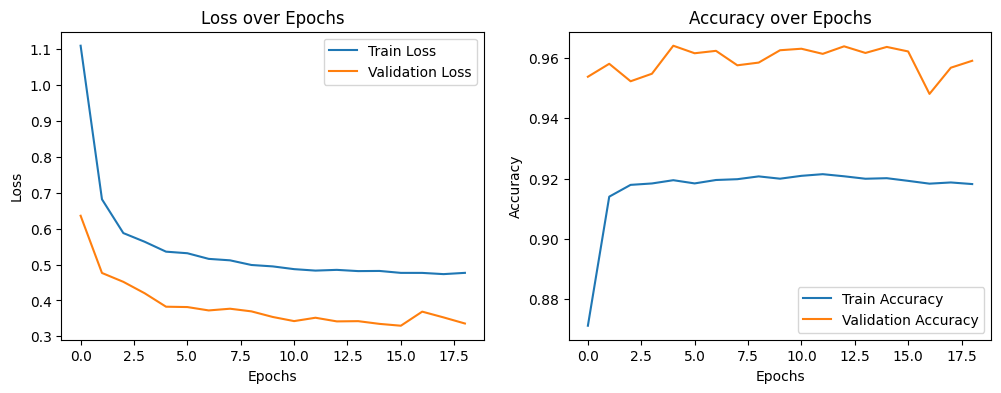

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


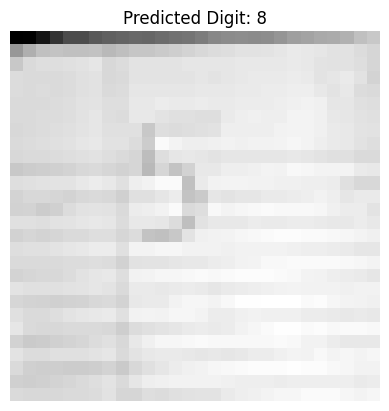

Predicted digit: 8


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data preprocessing: Flatten the images to 1D and normalize
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# One-hot encoding labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Model definition
model = Sequential([
    Dense(512, activation='relu', input_shape=(28*28,), kernel_regularizer=l2(0.001)),  # Increased neurons with L2 regularization
    BatchNormalization(),
    Dropout(0.5),  # Increased dropout to prevent overfitting

    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),  # More neurons with L2 regularization
    BatchNormalization(),
    Dropout(0.4),  # Dropout in the second layer

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Another hidden layer
    BatchNormalization(),
    Dropout(0.3),  # Dropout in the third layer

    Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping callback to prevent overfitting and improve generalization
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=20, batch_size=32, verbose=1, callbacks=[early_stopping])

# Evaluate the model
eval_results = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {eval_results[0]:.4f}, Test Accuracy: {eval_results[1]:.4f}")

# Plot training history for loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Function to predict a digit from an image
def predict_digit(img_path):
    from PIL import Image
    # Load and preprocess the image
    img = Image.open(img_path).convert('L')  # Convert image to grayscale
    img = img.resize((28, 28))  # Resize to 28x28
    img_array = np.array(img)  # Convert to numpy array
    img_array = img_array.astype('float32') / 255.0  # Normalize
    img_array = img_array.reshape(1, 28*28)  # Flatten for ANN

    # Predict the digit
    prediction = model.predict(img_array)
    predicted_digit = np.argmax(prediction)  # Get the class with the highest probability

    # Display the image and prediction
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.axis('off')
    plt.show()

    return predicted_digit

# Example usage: Replace with the path to your image
img_path = '/content/IMG_20241217_222645.jpg'  # Example path (replace with your file path)
predicted_digit = predict_digit(img_path)
print(f"Predicted digit: {predicted_digit}")
